## OptimESM Work Package 5: OSNAP AMOC Figures

### Description:

Notebook containing plots of AMOC diagnostics for OptimESM idealised experiments.

### Created By:

Ollie Tooth (oliver.tooth@noc.ac.uk)

In [1]:
# -- Import dependencies -- #
import gsw
import glob
import cftime
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt

from nemo_cookbook.stats import compute_binned_statistic

### **UKESM1-2-LL:** OSNAP

In [2]:
# -- Define filepaths -- #
ukesm1_dir = "/g100_work/optim_IAC/research/noc/otooth/OptimESM/WP5/data/MOHC/osnap"
ukesm1_names = "UKESM1-2-LL_*_osnap_*.nc"

ukesm1_paths = glob.glob(f"{ukesm1_dir}/{ukesm1_names}")
ukesm1_paths = sorted([path for path in ukesm1_paths if 'esm-hist' not in path])
ukesm1_paths


['/g100_work/optim_IAC/research/noc/otooth/OptimESM_WP5/data/MOHC/osnap/UKESM1-2-LL_esm-piControl_r1i1p1f1_osnap_2100-01-2199-12.nc',
 '/g100_work/optim_IAC/research/noc/otooth/OptimESM_WP5/data/MOHC/osnap/UKESM1-2-LL_esm-piControl_r1i1p1f1_osnap_2100-01-2500-12.nc',
 '/g100_work/optim_IAC/research/noc/otooth/OptimESM_WP5/data/MOHC/osnap/UKESM1-2-LL_esm-piControl_r1i1p1f1_osnap_2200-01-2299-12.nc',
 '/g100_work/optim_IAC/research/noc/otooth/OptimESM_WP5/data/MOHC/osnap/UKESM1-2-LL_esm-piControl_r1i1p1f1_osnap_2300-01-2399-12.nc',
 '/g100_work/optim_IAC/research/noc/otooth/OptimESM_WP5/data/MOHC/osnap/UKESM1-2-LL_esm-piControl_r1i1p1f1_osnap_2400-01-2499-12.nc',
 '/g100_work/optim_IAC/research/noc/otooth/OptimESM_WP5/data/MOHC/osnap/UKESM1-2-LL_esm-piControl_r1i1p1f1_osnap_2500-01-2500-12.nc',
 '/g100_work/optim_IAC/research/noc/otooth/OptimESM_WP5/data/MOHC/osnap/UKESM1-2-LL_esm-up2p0-gwl2p0_r1i1p1f1_osnap_1944-01-1999-12.nc',
 '/g100_work/optim_IAC/research/noc/otooth/OptimESM_WP5/dat

In [3]:
# -- Pre-Processing -- #
# Open esm-up2p0 with original time-axis:
time_coder = xr.coders.CFDatetimeCoder(time_unit="s")
ds_up2p0 = xr.open_dataset(f"{ukesm1_dir}/UKESM1-2-LL_esm-up2p0_r1i1p1f1_osnap_1850-01-2139-12.nc", decode_times=time_coder)
ds_up2p0_gwl2p0 = xr.open_mfdataset(f"{ukesm1_dir}/UKESM1-2-LL_esm-up2p0-gwl2p0_*.nc", decode_times=time_coder)
ds_up2p0_gwl3p0 = xr.open_mfdataset(f"{ukesm1_dir}/UKESM1-2-LL_esm-up2p0-gwl3p0_*.nc", decode_times=time_coder)
ds_up2p0_gwl4p0 = xr.open_mfdataset(f"{ukesm1_dir}/UKESM1-2-LL_esm-up2p0-gwl4p0_*.nc", decode_times=time_coder)


/scratch_local/slurm_job.18120140/ipykernel_15227/1925657307.py:5: FutureWarning: In a future version of xarray the default value for data_vars will change from data_vars='all' to data_vars=None. This is likely to lead to different results when multiple datasets have matching variables with overlapping values. To opt in to new defaults and get rid of these warnings now use `set_options(use_new_combine_kwarg_defaults=True) or set data_vars explicitly.
  ds_up2p0_gwl2p0 = xr.open_mfdataset(f"{ukesm1_dir}/UKESM1-2-LL_esm-up2p0-gwl2p0_*.nc", decode_times=time_coder)
/scratch_local/slurm_job.18120140/ipykernel_15227/1925657307.py:6: FutureWarning: In a future version of xarray the default value for data_vars will change from data_vars='all' to data_vars=None. This is likely to lead to different results when multiple datasets have matching variables with overlapping values. To opt in to new defaults and get rid of these warnings now use `set_options(use_new_combine_kwarg_defaults=True) or se

In [4]:
ds_up2p0['volume_transport'] = ds_up2p0['velocity'] * ds_up2p0['e1b'] * ds_up2p0['e3b']
# (ds_up2p0['volume_transport'] / 1E6).isel(bdy=slice(None, 25)).sum(dim='k').cumsum(dim='bdy').min(dim='bdy').resample(time_counter='1YE').mean().plot()

ds_up2p0_gwl2p0['volume_transport'] = ds_up2p0_gwl2p0['velocity'] * ds_up2p0_gwl2p0['e1b'] * ds_up2p0_gwl2p0['e3b']
# (ds_up2p0_gwl2p0['volume_transport'] / 1E6).isel(bdy=slice(None, 25)).sum(dim='k').cumsum(dim='bdy').min(dim='bdy').resample(time_counter='1YE').mean().plot()

ds_up2p0_gwl3p0['volume_transport'] = ds_up2p0_gwl3p0['velocity'] * ds_up2p0_gwl3p0['e1b'] * ds_up2p0_gwl3p0['e3b']
# (ds_up2p0_gwl3p0['volume_transport'] / 1E6).isel(bdy=slice(None, 25)).sum(dim='k').cumsum(dim='bdy').min(dim='bdy').resample(time_counter='1YE').mean().plot()

ds_up2p0_gwl4p0['volume_transport'] = ds_up2p0_gwl4p0['velocity'] * ds_up2p0_gwl4p0['e1b'] * ds_up2p0_gwl4p0['e3b']
# (ds_up2p0_gwl4p0['volume_transport'] / 1E6).isel(bdy=slice(None, 25)).sum(dim='k').cumsum(dim='bdy').min(dim='bdy').resample(time_counter='1YE').mean().plot()


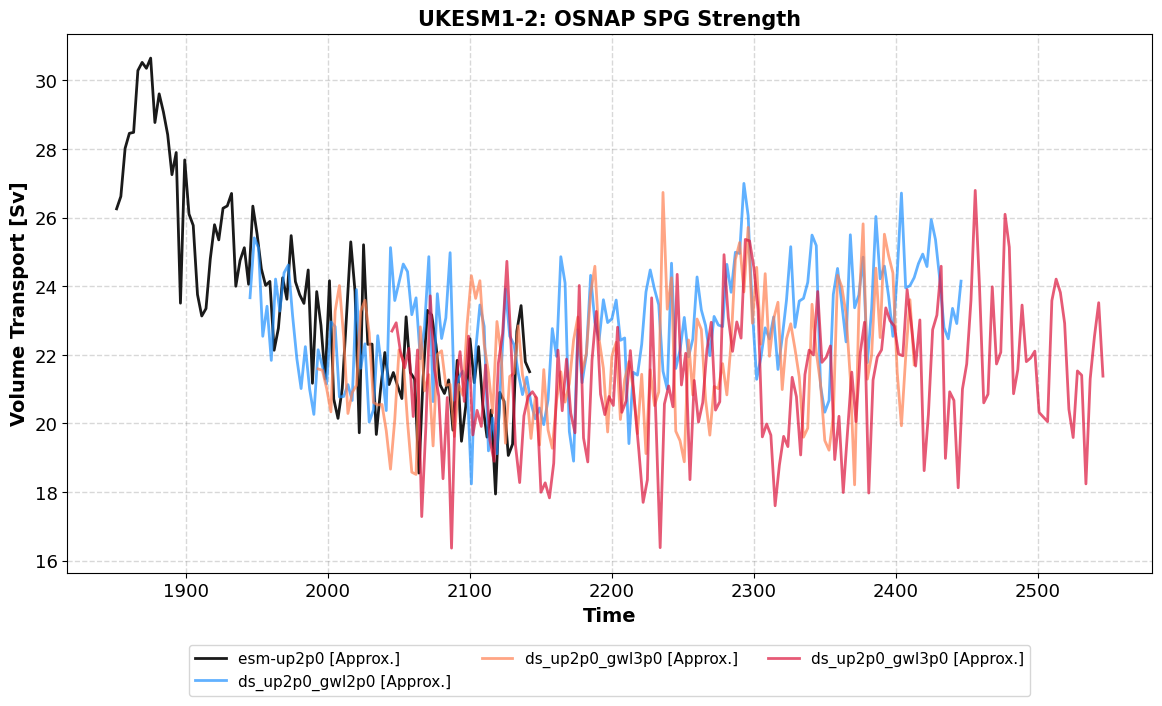

In [6]:
# -- Figure -- #
plt.figure(figsize=(14, 7))
plt.grid(True, linewidth=1, linestyle='--', color='0.5', alpha=0.3)

# Plot esm-up2p0:
(-ds_up2p0['volume_transport'] / 1E6).isel(bdy=slice(None, 25)).sum(dim='k').cumsum(dim='bdy').max(dim='bdy').resample(time_counter='3YE').mean().plot(lw=2, color='0.1', label='esm-up2p0 [Approx.]')

(-ds_up2p0_gwl2p0['volume_transport'] / 1E6).isel(bdy=slice(None, 25)).sum(dim='k').cumsum(dim='bdy').max(dim='bdy').resample(time_counter='3YE').mean().plot(lw=2, color='dodgerblue', alpha=0.7, label='ds_up2p0_gwl2p0 [Approx.]')

(-ds_up2p0_gwl3p0['volume_transport'] / 1E6).isel(bdy=slice(None, 25)).sum(dim='k').cumsum(dim='bdy').max(dim='bdy').resample(time_counter='3YE').mean().plot(lw=2, color='coral', alpha=0.7, label='ds_up2p0_gwl3p0 [Approx.]')

(-ds_up2p0_gwl4p0['volume_transport'] / 1E6).isel(bdy=slice(None, 25)).sum(dim='k').cumsum(dim='bdy').max(dim='bdy').resample(time_counter='3YE').mean().plot(lw=2, color='crimson', alpha=0.7, label='ds_up2p0_gwl3p0 [Approx.]')

# Configure Axes:
plt.title("UKESM1-2: OSNAP SPG Strength", fontdict={'size': 15, 'weight': 'bold'})
plt.xticks([cftime.Datetime360Day(yr, 1, 1) for yr in np.arange(1900, 2600, 100)], labels=np.arange(1900, 2600, 100).astype('str'), fontsize=13)
plt.xlabel("Time", fontdict={'size': 14, 'weight': 'bold'})
plt.yticks(fontsize=13)
plt.ylabel("Volume Transport [Sv]", fontdict={'size': 14, 'weight': 'bold'})
plt.legend(ncols=3, fontsize=11, loc="upper center", bbox_to_anchor=(0.5, -0.12))

# Save Figure:
plt.savefig("/g100_work/optim_IAC/research/noc/otooth/OptimESM/WP5/figures/fig_UKESM1-2_OSNAP_SPG_esm-up2p0-gwl.png", bbox_inches='tight', dpi=600)


In [9]:
(-ds_up2p0_gwl2p0['volume_transport'] / 1E6).isel(bdy=slice(None, 25)).sum(dim='k').cumsum(dim='bdy').max(dim='bdy').resample(time_counter='3YE').mean().std(dim='time_counter').values


array(1.66097512)

In [8]:
(-ds_up2p0_gwl4p0['volume_transport'] / 1E6).isel(bdy=slice(None, 25)).sum(dim='k').cumsum(dim='bdy').max(dim='bdy').resample(time_counter='3YE').mean().std(dim='time_counter').values


array(1.92923083)

In [26]:
# Define potential density & bins:
sigma0_bins = np.arange(21, 28.2, 0.01)
ds_up2p0['sigma0'] = gsw.sigma0(CT=ds_up2p0['thetao'], SA=ds_up2p0['so'])

# Compute Total OSNAP diapycnal overturning stream function:
ds_up2p0['moc_total'] = compute_binned_statistic(vars=[ds_up2p0['sigma0']],
                                                 values=ds_up2p0['volume_transport'],
                                                 keep_dims=['time_counter'],
                                                 bins=[sigma0_bins],
                                                 statistic='nansum',
                                                 mask=None
                                                 ).cumsum(dim='sigma0_bins')

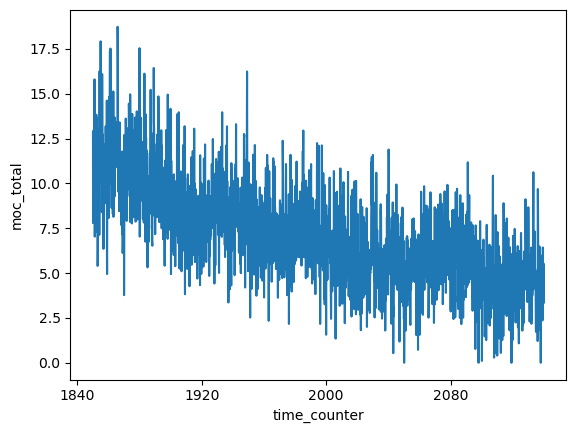

In [30]:
(ds_up2p0['moc_total'] / 1E6).max(dim='sigma0_bins').plot()

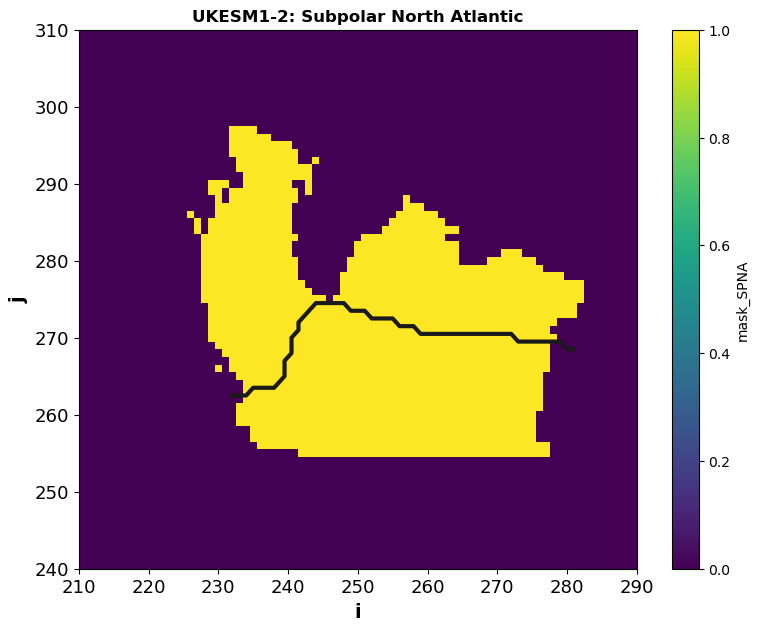

In [21]:
# -- Pre-Processing esm-piControl -- #
# Open esm-piControl with original time-axis:
time_coder = xr.coders.CFDatetimeCoder(time_unit="s")
ds_piControl = xr.open_dataset("/g100_work/optim_IAC/research/noc/otooth/OptimESM/WP5/data/MOHC/mlotst/UKESM1-2-LL_esm-piControl_r1i1p1f1_mlotst_2100-01-2500-12.nc", decode_times=time_coder)

plt.figure(figsize=(9, 7))
ds_piControl.mask_SPNA.plot(xlim=[210, 290], ylim=[240, 310])

plt.plot(ds_up2p0['i_bdy'], ds_up2p0['j_bdy'], lw=3, color='0.1')

# Configure Axes:
plt.title("UKESM1-2: Subpolar North Atlantic", fontdict={'size': 12, 'weight': 'bold'})
plt.xlabel("i", fontdict={'size': 14, 'weight': 'bold'})
plt.xticks(fontsize=13)
plt.ylabel("j", fontdict={'size': 14, 'weight': 'bold'})
plt.yticks(fontsize=13)

# Save Figure:
plt.savefig("/g100_work/optim_IAC/research/noc/otooth/OptimESM/WP5/figures/fig_UKESM1-2_OSNAP_mask.png", bbox_inches='tight', dpi=600)